
## Optical Particle Counter (OPC) Calibration
The calibration was done by using salt solutions with varied molar concentrations. The salt solution was fed into an atomizer providing air-born salt particles. The particles were forced through an adjustable filter enabling varied concentrations and into a 22L glass chamber where the UBC OPC sensors were located. The Grimm OPC sensor pulled air from the chamber to sample the salt concentrations as well. There was an exhaust port to maintain persistent salt concentration levels and a small fan within the chamber to mix the air. 

The two OPC sensors were sampling at varied rates.
<br>
<br>

The  UBC OPCs:   ~1.3 seconds
<br>
THE GRIMM OPC: 1 min 
<br>

<br>
TODO add images of set up

In [1]:
import context
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.pylab as pylab

from datetime import datetime, timedelta
from pathlib import Path
from context import data_dir, save_dir

******************************
context imported. Front of path:
/Users/rodell/Documents/Arduino/docs
/Users/rodell/Documents/Arduino/docs/source
******************************

through /Users/rodell/Documents/Arduino/docs/source/context.py -- pha



## Lets call in the OPC data!

In [2]:

## define date of interest
date_of_int = '20210430' # options 20210430 or 20210502


def prepare_df(df):
  """
  Function cleans UBC OPCs data by removeing duplicate headers and droping error values. 
  Once cleaned takes 1 min avg of data to match GRIM sample rate
  """
  df = df.drop(df[df.rtctime == 'rtctime'].index)
  df = df[~df['pm10_env'].str.contains('Rec')]
  time = pd.to_datetime(df['rtctime'])
  df.index = pd.DatetimeIndex(pd.to_datetime(df['rtctime']))
  df = df.drop(['rtctime'], axis=1)
  df = df.astype(float)
  df = df[df['pm10_env'] < 4000]
  df = df[df['pm25_env'] < 4000]
  df = df[df['pm100_env'] < 4000]

  df = df.resample('1Min').mean()

  return df



Open the ubc opcs

In [3]:
df_pm01 = prepare_df(pd.read_csv(str(data_dir) + "/UBC-PM-01/" + date_of_int + '.TXT'))
df_pm02 = prepare_df(pd.read_csv(str(data_dir) + "/UBC-PM-02/" + date_of_int + '.TXT'))
df_pm03 = prepare_df(pd.read_csv(str(data_dir) + "/UBC-PM-03/" + date_of_int + '.TXT'))
df_pm04 = prepare_df(pd.read_csv(str(data_dir) + "/UBC-PM-04/" + date_of_int + '.TXT'))
df_pm05 = prepare_df(pd.read_csv(str(data_dir) + "/UBC-PM-05/" + date_of_int + '.TXT'))

Open the grim opc

In [4]:
try:
  df_grim = pd.read_csv(str(data_dir) + f'/GRIM/{date_of_int}.csv')
  df_grim['date & time'] = pd.to_datetime(df_grim['date & time'])
except:
  pathlist = sorted(Path(str(data_dir) + '/2021_OPCintercomparison/').glob(f'{date_of_int}*'))
  sheets = ['PM values', 'Count values', 'Mass values', 'Log values']
  df_grim = [pd.read_excel(f'{pathlist[0]}/{pathlist[0].stem}_sample01.xlsx', sheet_name= sheet, skiprows=4, engine='openpyxl') for sheet in sheets]
  df_grim = reduce(lambda x, y: pd.merge(x, y, on='date & time'), df_grim)
  df_grim['date & time'] = pd.to_datetime(df_grim['date & time'], dayfirst=True)
  df_grim.to_csv(str(data_dir) + f'/GRIM/{date_of_int}.csv', index=False)




Define default font sizes

In [5]:
params = {
         'xtick.labelsize':14,
         'ytick.labelsize': 14,
          'axes.labelsize':14,

         }

pylab.rcParams.update(params)

### Plot PM 1.0 

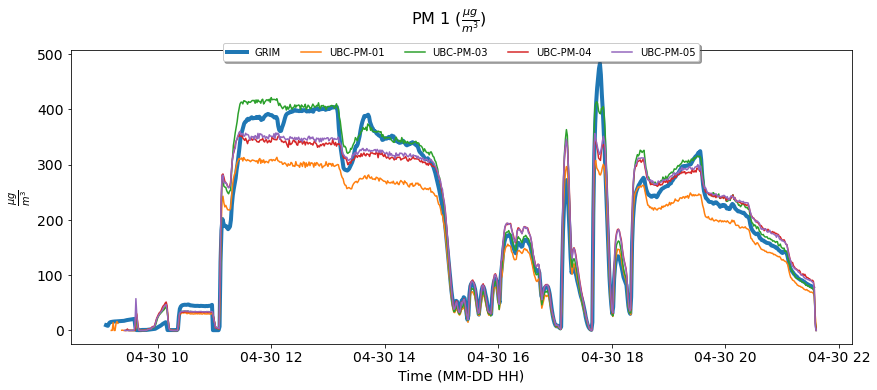

In [6]:
grim_vars = list(df_grim)
ubc_vars = list(df_pm01)
fig = plt.figure(figsize=(14, 6))
fig.autofmt_xdate()
xfmt = DateFormatter("%m-%d %H:00")
fig.suptitle(r"PM 1 ($\frac{\mu g}{m^3}$)", fontsize=16)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_grim['date & time'],df_grim['PM1 [ug/m3]'], lw = 4.0, label = 'GRIM')
ax.plot(df_pm01.index,df_pm01['pm10_env'], label = 'UBC-PM-01')
# ax.plot(df_pm02.index,df_pm02['pm10_env'], label = 'UBC-PM-02')
ax.plot(df_pm03.index,df_pm03['pm10_env'], label = 'UBC-PM-03')
ax.plot(df_pm04.index,df_pm04['pm10_env'], label = 'UBC-PM-04')
ax.plot(df_pm05.index,df_pm05['pm10_env'], label = 'UBC-PM-05')
ax.set_ylabel(r'$\frac{\mu g}{m^3}$')
ax.set_xlabel('Time (MM-DD HH)')

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.04),
    ncol=6,
    fancybox=True,
    shadow=True,
)

### Plot PM 2.5 

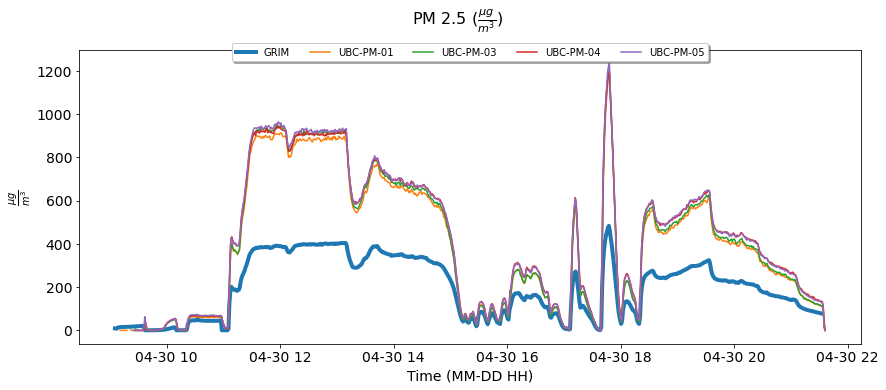

In [7]:

fig = plt.figure(figsize=(14, 6))
fig.autofmt_xdate()
xfmt = DateFormatter("%m-%d %H:00")
fig.suptitle(r"PM 2.5 ($\frac{\mu g}{m^3}$)", fontsize=16)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_grim['date & time'],df_grim['PM2.5 [ug/m3]'], lw = 4.0, label = 'GRIM')
ax.plot(df_pm01.index,df_pm01['pm25_env'], label = 'UBC-PM-01')
# ax.plot(df_pm02.index,df_pm02['pm25_env'], label = 'UBC-PM-02')
ax.plot(df_pm03.index,df_pm03['pm25_env'], label = 'UBC-PM-03')
ax.plot(df_pm04.index,df_pm04['pm25_env'], label = 'UBC-PM-04')
ax.plot(df_pm05.index,df_pm05['pm25_env'], label = 'UBC-PM-05')
ax.set_ylabel(r'$\frac{\mu g}{m^3}$')
ax.set_xlabel('Time (MM-DD HH)')
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.04),
    ncol=6,
    fancybox=True,
    shadow=True,
)

### Plot PM 10 

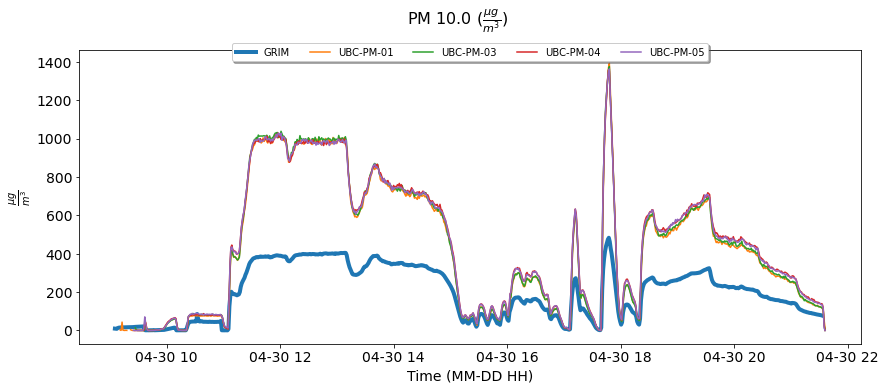

In [8]:

fig = plt.figure(figsize=(14, 6))
fig.autofmt_xdate()
xfmt = DateFormatter("%m-%d %H:00")
fig.suptitle(r"PM 10.0 ($\frac{\mu g}{m^3}$)", fontsize=16)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_grim['date & time'],df_grim['PM10 [ug/m3]'], lw = 4.0, label = 'GRIM')
ax.plot(df_pm01.index,df_pm01['pm100_env'], label = 'UBC-PM-01')
# ax.plot(df_pm02.index,df_pm02['pm100_env'], label = 'UBC-PM-02')
ax.plot(df_pm03.index,df_pm03['pm100_env'], label = 'UBC-PM-03')
ax.plot(df_pm04.index,df_pm04['pm100_env'], label = 'UBC-PM-04')
ax.plot(df_pm05.index,df_pm05['pm100_env'], label = 'UBC-PM-05')
ax.set_ylabel(r'$\frac{\mu g}{m^3}$')
ax.set_xlabel('Time (MM-DD HH)')
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.04),
    ncol=6,
    fancybox=True,
    shadow=True,
)